# What is Groupby in Pandas?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

key1   key2     data1     data2
0    a    one  0.128979  0.903436
1    a    two -0.334460 -1.431566
2    b  three -0.506455 -0.854207
3    b    one  2.135132 -0.996191
4    a    two -0.979153  1.918519
5    b  three -0.165257  0.204901

In [3]:
group=df["data1"].groupby(df["key1"])

In [4]:
group

In [5]:
group.mean()

key1
a   -0.394878
b    0.487807
Name: data1, dtype: float64

In [6]:
ave=df["data1"].groupby([df["key1"],
                         df["key2"]]).mean()
ave

key1  key2 
a     one      0.128979
      two     -0.656807
b     one      2.135132
      three   -0.335856
Name: data1, dtype: float64

In [7]:
ave.unstack()

key2       one     three       two
key1                              
a     0.128979       NaN -0.656807
b     2.135132 -0.335856       NaN

In [8]:
df.groupby("key1").mean()

data1     data2
key1                    
a    -0.394878  0.463463
b     0.487807 -0.548499

In [9]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                     
a    one    0.128979  0.903436
     two   -0.656807  0.243476
b    one    2.135132 -0.996191
     three -0.335856 -0.324653

## Iterating over Groups

In [10]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.128979  0.903436
1    a  two -0.334460 -1.431566
4    a  two -0.979153  1.918519
b
  key1   key2     data1     data2
2    b  three -0.506455 -0.854207
3    b    one  2.135132 -0.996191
5    b  three -0.165257  0.204901


In [11]:
for (x1,x2),group in df.groupby(["key1",
                                 "key2"]):
    print(x1,x2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  0.128979  0.903436
a two
  key1 key2     data1     data2
1    a  two -0.334460 -1.431566
4    a  two -0.979153  1.918519
b one
  key1 key2     data1     data2
3    b  one  2.135132 -0.996191
b three
  key1   key2     data1     data2
2    b  three -0.506455 -0.854207
5    b  three -0.165257  0.204901


In [12]:
piece=dict(list(df.groupby("key1")))

In [13]:
piece["a"]

key1 key2     data1     data2
0    a  one  0.128979  0.903436
1    a  two -0.334460 -1.431566
4    a  two -0.979153  1.918519

## Selecting a Column or Subset of Columns

In [14]:
df.groupby(['key1', 
            'key2'])[['data1']].mean()

data1
key1 key2           
a    one    0.128979
     two   -0.656807
b    one    2.135132
     three -0.335856

## Grouping with Dicts and Series

In [15]:
fruit=pd.DataFrame(np.random.randn(4,4),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"])
fruit

a         b         c         d
apple   0.803066  0.165556  0.040465 -0.376024
cherry -0.265198  0.778739  0.574622 -1.292316
banana -0.977442 -0.458472 -1.271370  0.614398
kiwi    0.580412  0.061148  1.257117 -1.351419

In [16]:
label={"a": "green","b":"yellow",
       "c":"green","d":"yellow",
       "e":"purple"}

In [17]:
group=fruit.groupby(label,axis=1)

In [18]:
group.sum()

green    yellow
apple   0.843531 -0.210469
cherry  0.309424 -0.513577
banana -2.248812  0.155926
kiwi    1.837529 -1.290271

In [19]:
s=pd.Series(label)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [20]:
fruit.groupby(s,axis=1).count()

green  yellow
apple       2       2
cherry      2       2
banana      2       2
kiwi        2       2

## Grouping with Functions

In [21]:
fruit.groupby(len).sum()

a         b         c         d
4  0.580412  0.061148  1.257117 -1.351419
5  0.803066  0.165556  0.040465 -0.376024
6 -1.242640  0.320267 -0.696747 -0.677917

## Grouping by Index Levels

In [22]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]])

In [23]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0       0.741181 -0.399735  0.562333 -1.035530  0.678250
1       0.394531  0.745952 -0.661248  0.811781 -0.804934
2       0.028793 -0.914979  0.857640 -0.780221  1.898880
3      -0.029662  0.092263  1.424289 -0.143006  1.484412

In [24]:
data.groupby(level="letter",axis=1).sum()

letter         A         B
0       0.903779 -0.357280
1       0.479235  0.006847
2      -0.028546  1.118659
3       1.486890  1.341406

## Application with Real Data Set 

In [25]:
game=pd.read_csv("Data/vgsalesGlobale.csv")

In [26]:
game.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [27]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [28]:
game.dropna().describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [29]:
game.Global_Sales.mean()

0.5374406555006628

In [30]:
group=game.groupby("Genre")

In [31]:
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [32]:
group["Global_Sales"].describe()

count      mean       std   min   25%    50%     75%    max
Genre                                                                     
Action        3316.0  0.528100  1.156427  0.01  0.07  0.190  0.5000  21.40
Adventure     1286.0  0.185879  0.513280  0.01  0.02  0.060  0.1600  11.18
Fighting       848.0  0.529375  0.955965  0.01  0.08  0.210  0.5500  13.04
Misc          1739.0  0.465762  1.314886  0.01  0.06  0.160  0.4100  29.02
Platform       886.0  0.938341  2.585254  0.01  0.09  0.280  0.7900  40.24
Puzzle         582.0  0.420876  1.561716  0.01  0.04  0.110  0.3075  30.26
Racing        1249.0  0.586101  1.662437  0.01  0.07  0.190  0.5300  35.82
Role-Playing  1488.0  0.623233  1.707909  0.01  0.07  0.185  0.5225  31.37
Shooter       1310.0  0.791885  1.817263  0.01  0.08  0.230  0.7275  28.31
Simulation     867.0  0.452364  1.195255  0.01  0.05  0.160  0.4200  24.76
Sports        2346.0  0.567319  2.089716  0.01  0.09  0.220  0.5600  82.74
Strategy       681.0  0.257151  0.520908  0.01  0.04  0.090  0.2700   5.45

In [33]:
game[game.Genre=="Action"].Global_Sales.mean()

0.5281001206272617

In [34]:
group.mean()

Rank         Year  NA_Sales  EU_Sales  JP_Sales  \
Genre                                                                   
Action         7973.879071  2007.909929  0.264726  0.158323  0.048236   
Adventure     11532.787714  2008.130878  0.082271  0.049868  0.040490   
Fighting       7646.511792  2004.630383  0.263667  0.119481  0.103007   
Misc           8561.847039  2007.258480  0.235906  0.124198  0.061967   
Platform       6927.251693  2003.820776  0.504571  0.227573  0.147596   
Puzzle         9627.381443  2005.243433  0.212680  0.087251  0.098471   
Racing         7961.515612  2004.840131  0.287766  0.190865  0.045388   
Role-Playing   8086.174731  2007.055744  0.219946  0.126384  0.236767   
Shooter        7369.367939  2005.918877  0.444733  0.239137  0.029221   
Simulation     8626.085352  2006.567568  0.211430  0.130773  0.073472   
Sports         7425.026428  2005.477865  0.291283  0.160635  0.057702   
Strategy      10071.897210  2005.599106  0.100881  0.066579  0.072628   

              Other_Sales  Global_Sales  
Genre                                    
Action           0.056508      0.528100  
Adventure        0.013072      0.185879  
Fighting         0.043255      0.529375  
Misc             0.043312      0.465762  
Platform         0.058228      0.938341  
Puzzle           0.021564      0.420876  
Racing           0.061865      0.586101  
Role-Playing     0.040060      0.623233  
Shooter          0.078389      0.791885  
Simulation       0.036355      0.452364  
Sports           0.057532      0.567319  
Strategy         0.016681      0.257151

In [35]:
%matplotlib inline

<AxesSubplot:xlabel='Genre'>

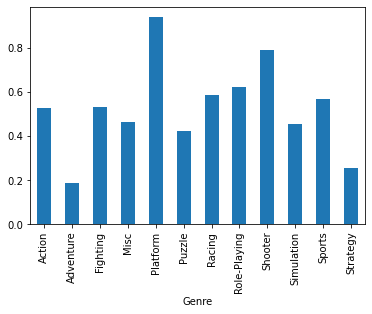

In [36]:
group["Global_Sales"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Genre'>

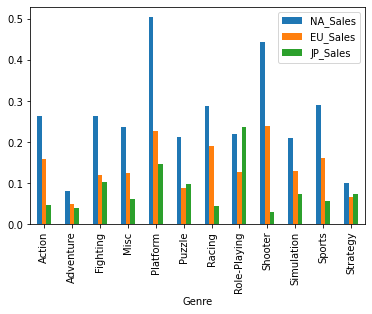

In [37]:
group[["NA_Sales",
       "EU_Sales",
       "JP_Sales"]].mean().plot(kind="bar")